# PCA from scratch

https://towardsdatascience.com/principal-component-analysis-pca-from-scratch-in-python-7f3e2a540c51
https://towardsdatascience.com/5-pca-visualizations-you-must-try-on-your-next-data-science-project-148ec3d31e4d


In [1]:
from pathlib import Path
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

In [2]:

# df = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')
df = pd.read_csv(Path('../data/WineQT.csv'), index_col='Id')
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [3]:
X = df.drop("quality", axis=1)
y = df["quality"]

## The dimensionality reduction

In [4]:
## Data scaling
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

In [5]:
## Covariance matrix
X_scaled_transponse = X_scaled.T
print(f"X_scaled_transponse.shape: {X_scaled_transponse.shape}")
cov_matrix = np.cov(X_scaled_transponse)
print(f"Covariance matrix.shape: {cov_matrix.shape}")
# print(f"Cov_matrix: \n{cov_matrix}")

X_scaled_transponse.shape: (11, 1143)
Covariance matrix.shape: (11, 11)


In [6]:
## Eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
# eigenvalues --> pca.explained_variance_ratio_
# eigenvectors --> pca.components_
print(f"Eigenvalues.shape: {eigenvalues.shape}")
# print(eigenvalues)
print(f"Eigenvectors.shape: {eigenvectors.shape}")
# print(eigenvectors)

Eigenvalues.shape: (11,)
Eigenvectors.shape: (11, 11)


In [7]:
# A table with the PCs and the explained variable
pc_labels = [f"PC{i+1}" for i in range(X_scaled.shape[1])]
proyected_pcs = np.dot(X_scaled, eigenvectors)  # But *-1 vs pca.transform !!
proyected_pcs_y =  np.concatenate((proyected_pcs, np.expand_dims(y, axis=1)), axis=1)
proyections = pd.DataFrame(proyected_pcs_y, columns=pc_labels + ['y'])
proyections

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,y
0,1.560862,-0.444697,1.766436,-0.132577,-0.130081,-0.046445,-0.249502,-0.906418,0.122282,-0.011543,0.329941,5.0
1,0.760559,-1.914220,0.863780,-0.536655,-0.090895,0.134751,0.005193,0.860030,0.998186,0.547404,-0.746612,5.0
2,0.707776,-0.914023,1.141863,-0.434885,-0.024929,0.122500,-0.203626,0.356546,0.535927,0.084081,-0.575400,5.0
3,-2.307156,0.224350,-0.256783,0.830267,1.638492,-0.313540,-0.121745,-0.154653,-0.300279,-0.110039,0.494372,6.0
4,1.560862,-0.444697,1.766436,-0.132577,-0.130081,-0.046445,-0.249502,-0.906418,0.122282,-0.011543,0.329941,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1.441602,-0.332007,-1.137315,-0.440870,-0.231926,0.381828,0.217220,-0.498905,0.184996,0.866831,-0.061628,6.0
1139,1.222463,-0.921215,-0.027222,-0.854911,0.155442,-0.007890,0.580827,-1.130447,0.605628,0.867638,-0.364070,6.0
1140,2.123706,-0.873422,-0.626298,-0.399291,0.177190,0.033915,0.296561,0.063053,-0.220935,1.007650,0.357445,5.0
1141,2.207569,-0.927936,-1.814609,-0.339574,-0.188919,0.215308,0.436315,-0.665353,0.539401,1.150074,0.269344,6.0


### PCA implementation

In [8]:
# The proyections table can be obtained from the PCA object 
# !! Pero la matriz esta multiplicata por -1 en comparacion con la de numpy!!!
pca = PCA().fit(X_scaled)
proyected_pcs_pca = pca.transform(X_scaled)
# La misma tabla de proyectec pero sin columna 'y'
proyections_pca = pd.DataFrame(proyected_pcs_pca, columns=pc_labels)
proyections_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-1.560862,0.444697,-1.766436,0.132577,0.130081,-0.906418,0.122282,-0.329941,0.011543,0.249502,0.046445
1,-0.760559,1.914220,-0.863780,0.536655,0.090895,0.860030,0.998186,0.746612,-0.547404,-0.005193,-0.134751
2,-0.707776,0.914023,-1.141863,0.434885,0.024929,0.356546,0.535927,0.575400,-0.084081,0.203626,-0.122500
3,2.307156,-0.224350,0.256783,-0.830267,-1.638492,-0.154653,-0.300279,-0.494372,0.110039,0.121745,0.313540
4,-1.560862,0.444697,-1.766436,0.132577,0.130081,-0.906418,0.122282,-0.329941,0.011543,0.249502,0.046445
...,...,...,...,...,...,...,...,...,...,...,...
1138,-1.441602,0.332007,1.137315,0.440870,0.231926,-0.498905,0.184996,0.061628,-0.866831,-0.217220,-0.381828
1139,-1.222463,0.921215,0.027222,0.854911,-0.155442,-1.130447,0.605628,0.364070,-0.867638,-0.580827,0.007890
1140,-2.123706,0.873422,0.626298,0.399291,-0.177190,0.063053,-0.220935,-0.357445,-1.007650,-0.296561,-0.033915
1141,-2.207569,0.927936,1.814609,0.339574,0.188919,-0.665353,0.539401,-0.269344,-1.150074,-0.436315,-0.215308


## The visualizations

### Explained variance per principal component

<BarContainer object of 11 artists>

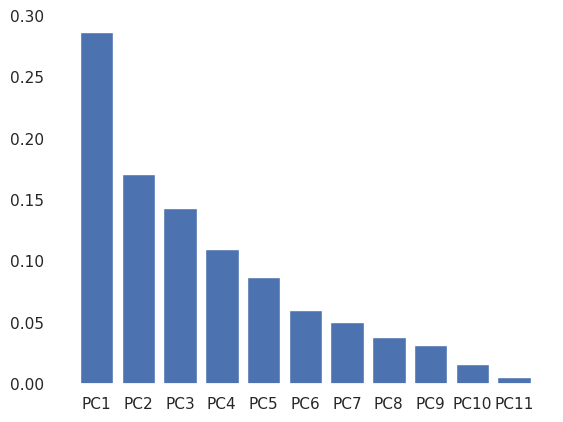

In [9]:
## Explained variance per principal component. Numpy
eigenvalues_desc = -np.sort(-eigenvalues)
explained_variances_np  = [i/np.sum(eigenvalues) for i in eigenvalues_desc]  
# eigenvalues --> pca.explained_variance_ratio_
plt.bar(pc_labels, explained_variances_np)


<BarContainer object of 11 artists>

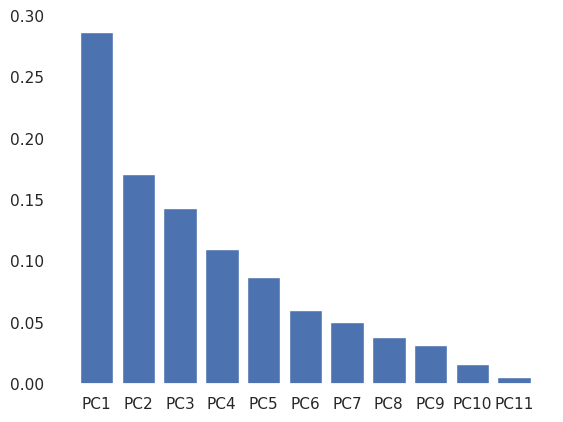

In [10]:
## Explained variance per principal component. PCA()
explained_variance_ratio = pca.explained_variance_ratio_
# eigenvalues --> pca.explained_variance_ratio_
explained_variances_pca  = [i/np.sum(explained_variance_ratio) for i in explained_variance_ratio]
plt.bar(pc_labels, explained_variances_pca)

### Cumulative Explained Variance

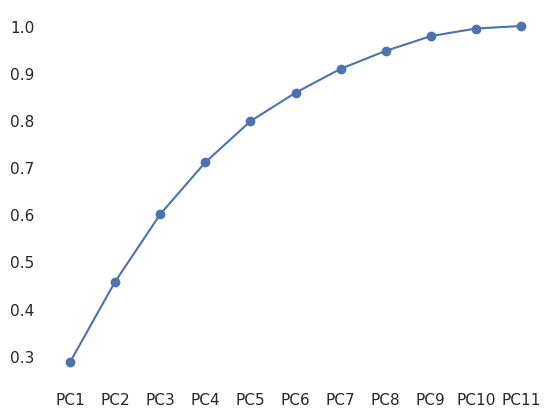

In [11]:
## Cumulative Explained Variance. Numpy | PCA()
# the same plot using explained_variances_np | explained_variances_pca
# cumulative_variance_np = np.cumsum(explained_variances_np)
cumulative_variance_np = np.cumsum(explained_variances_pca)
plt.plot(pc_labels, cumulative_variance_np, marker="o")

### 2D Scatter Plot

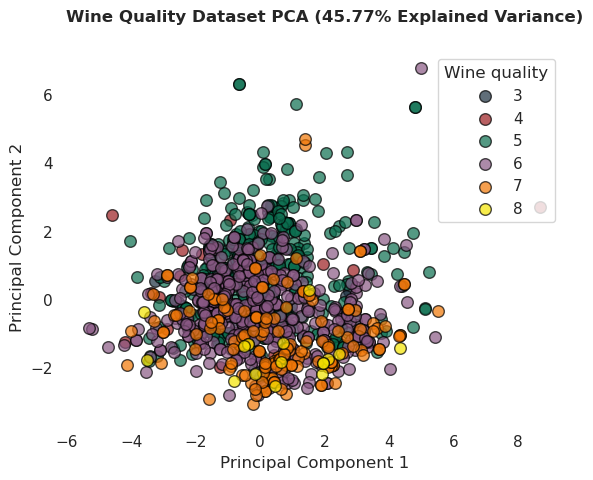

In [25]:
# The first two components capture ~ 45% of the variance. 
# It’s a decent amount, but a 2-dimensional scatter plot still won’t 
# account for more than half of it

total_explained_variance = sum(pca.explained_variance_ratio_[:2]) * 100
colors = ["#1C3041", "#9B1D20", "#0B6E4F", "#895884", "#F07605", "#F5E400"]

pca_2d_df = pd.DataFrame(proyections_pca.iloc[:, :2], columns=["PC1", "PC2"])
pca_2d_df['y'] = y

fig, ax = plt.subplots()
for i, target in enumerate(sorted(y.unique())):
    subset = pca_2d_df[(y == target).values]
    ax.scatter(x=subset["PC1"], y=subset["PC2"], s=70, alpha=0.7, c=colors[i], edgecolors="#000000", label=target)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title(f"Wine Quality Dataset PCA ({total_explained_variance:.2f}% Explained Variance)", loc="left", fontdict={"weight": "bold"}, y=1.06)

ax.legend(title="Wine quality")
plt.show()

### 3D Scatterplot

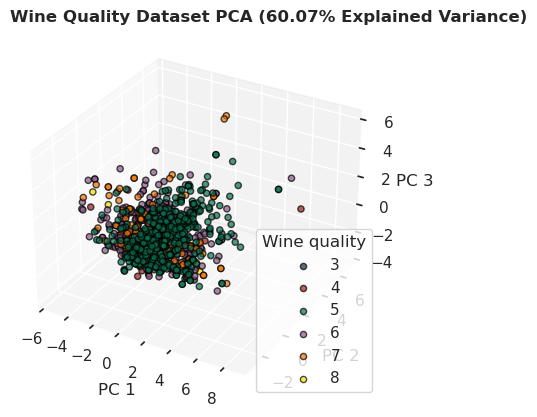

In [38]:
total_explained_variance = sum(pca.explained_variance_ratio_[:3]) * 100
colors = ["#1C3041", "#9B1D20", "#0B6E4F", "#895884", "#F07605", "#F5E400"]

pca_3d_df = pd.DataFrame(proyections_pca.iloc[:, :3], columns=["PC1", "PC2", "PC3"])
pca_3d_df['y'] = y

fig = plt.figure()   #(figsize=(10, 10))
ax = fig.add_subplot(projection="3d")

for i, target in enumerate(sorted(y.unique())):
    subset = pca_3d_df[(y == target).values]
    ax.scatter(xs=subset["PC1"], ys=subset["PC2"], zs=subset["PC3"], s=20, alpha=0.7, c=colors[i], edgecolors="#000000", label=target)

ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")
ax.set_title(f"Wine Quality Dataset PCA ({total_explained_variance:.2f}% Explained Variance)", loc="left", fontdict={"weight": "bold"})

ax.legend(title="Wine quality", loc="lower right")
plt.show()

## Biplot

To see how the original variables contribute and correlate with the PCs

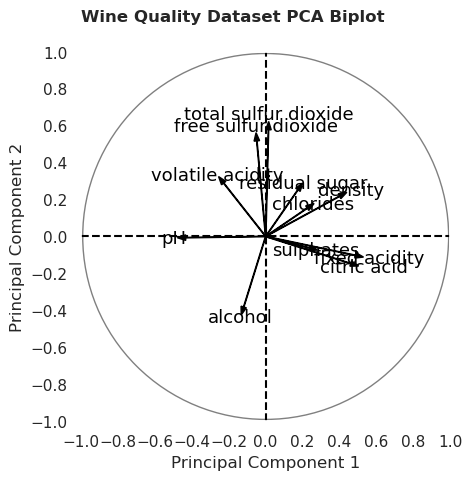

In [40]:
labels = X.columns
n = len(labels)
coeff = np.transpose(pca.components_)
pc1 = pca.components_[:, 0]
pc2 = pca.components_[:, 1]

plt.figure()  #(figsize=(8, 8))

for i in range(n):
    plt.arrow(x=0, y=0, dx=coeff[i, 0], dy=coeff[i, 1], color="#000000", width=0.003, head_width=0.03)
    plt.text(x=coeff[i, 0] * 1.15, y=coeff[i, 1] * 1.15, s=labels[i], size=13, color="#000000", ha="center", va="center")

plt.axis("square")
plt.title(f"Wine Quality Dataset PCA Biplot", loc="left", fontdict={"weight": "bold"}, y=1.06)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xticks(np.arange(-1, 1.1, 0.2))
plt.yticks(np.arange(-1, 1.1, 0.2))

plt.axhline(y=0, color="black", linestyle="--")
plt.axvline(x=0, color="black", linestyle="--")
circle = plt.Circle((0, 0), 0.99, color="gray", fill=False)
plt.gca().add_artist(circle)

plt.grid()
plt.show()

* Arrow direction: Indicates how the corresponding variable is aligned with the principal component. Arrows that point in the same direction are positively correlated. Arrows pointing in the opposite direction are negatively correlated.
* Arrow length: Shows how much the variable contributes to the principal components. Longer arrows mean stronger contribution (the variable accounts for more explained variance). Shorter arrows mean weaker contribution (the variable accounts for less explained variance).
* Angle between arrows: 0º indicates a perfect positive correlation. 180º indicates a perfect negative correlation. 90º indicates no correlation.
> From the above chart, you can see how the features `sulphates`, `fixed acidity`, and `citric accid` show a **high correlation**.

###  Loading Score Plot

To see which variables have the most influence on each PC.  
Loading score is a value that represents the weight of an original variable to a given principal component. A higher absolute value indicates higher influence.  
These are essentially correlations with a principal component and range from -1 to +1. You don’t often care about the direction, just the magnitude.

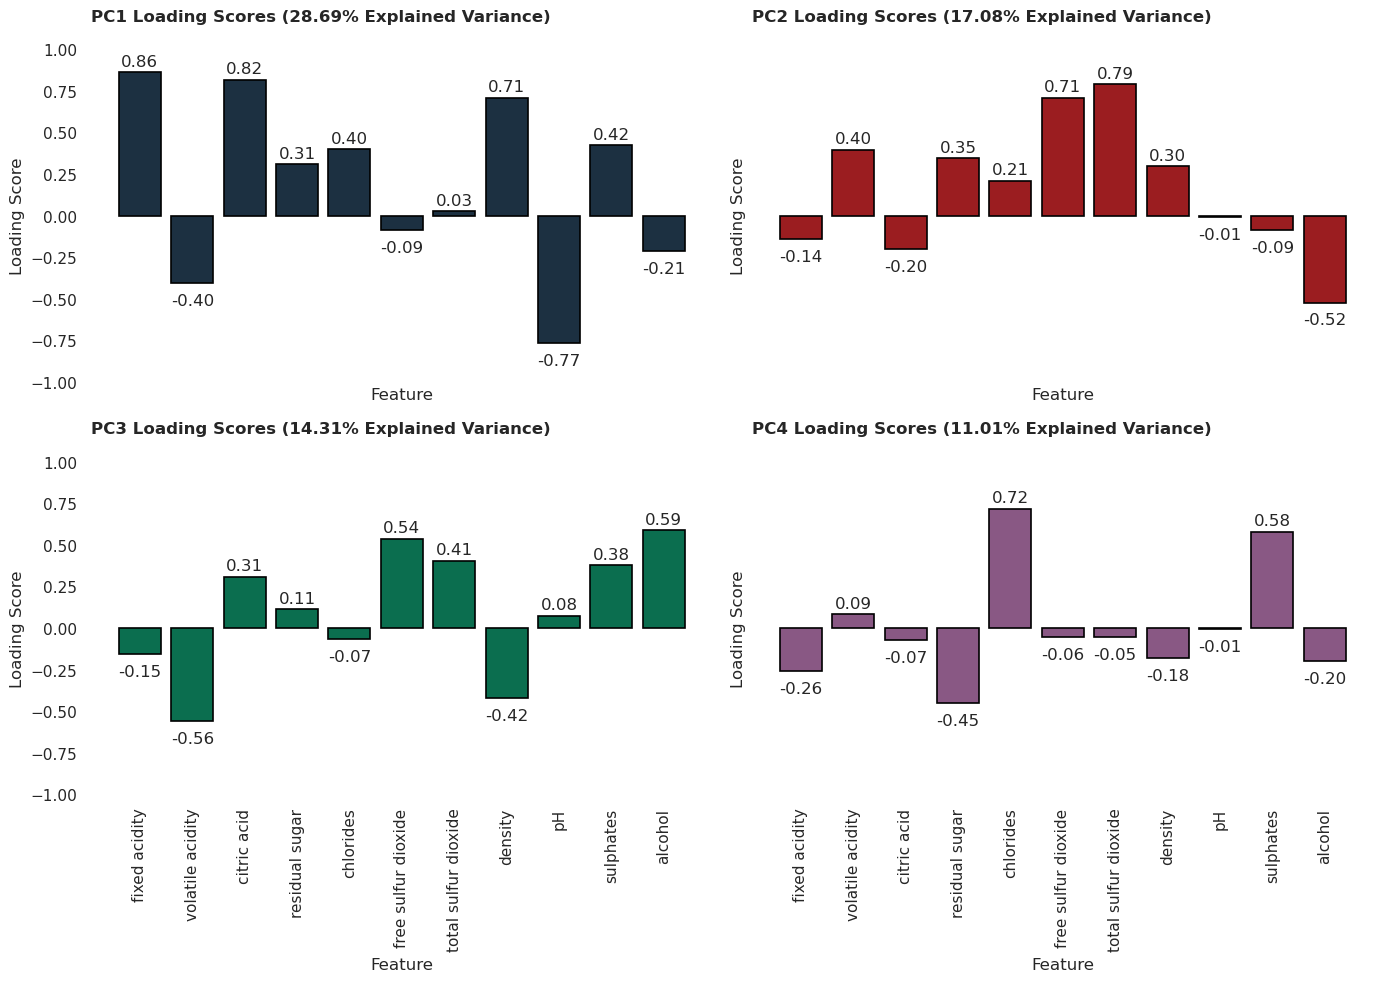

In [41]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f"PC{i}" for i in range(1, len(X.columns) + 1)],
    index=X.columns
)

fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=True)
colors = ["#1C3041", "#9B1D20", "#0B6E4F", "#895884"]

for i, ax in enumerate(axs.flatten()):
    explained_variance = pca.explained_variance_ratio_[i] * 100
    pc = f"PC{i+1}"
    bars = ax.bar(loadings.index, loadings[pc], color=colors[i], edgecolor="#000000", linewidth=1.2)
    ax.set_title(f"{pc} Loading Scores ({explained_variance:.2f}% Explained Variance)", loc="left", fontdict={"weight": "bold"}, y=1.06)
    ax.set_xlabel("Feature")
    ax.set_ylabel("Loading Score")
    ax.grid(axis="y")
    ax.tick_params(axis="x", rotation=90)
    ax.set_ylim(-1, 1)
    
    for bar in bars:
        yval = bar.get_height()
        offset = yval + 0.02 if yval > 0 else yval - 0.15
        ax.text(bar.get_x() + bar.get_width() / 2, offset, f"{yval:.2f}", ha="center", va="bottom")

plt.tight_layout()
plt.show()

If the first principal component accounts for ~ 29% of the variability and the fixed accidity feature has a high loading score (0.86), it means it’s an important feature and should be kept for further analysis and predictive modeling.  
> Could be used as a feature selection technique.